In [7]:
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
os.environ['MLFLOW_TRACKING_URI'] = 'http://localhost:8000'

In [3]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

In [4]:
dt_params = {
	'max_depth' : 5,
	'max_features' : 'sqrt',
	'min_samples_split' : 6,
}
dt_model = DecisionTreeClassifier(**dt_params).fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred).round(3)

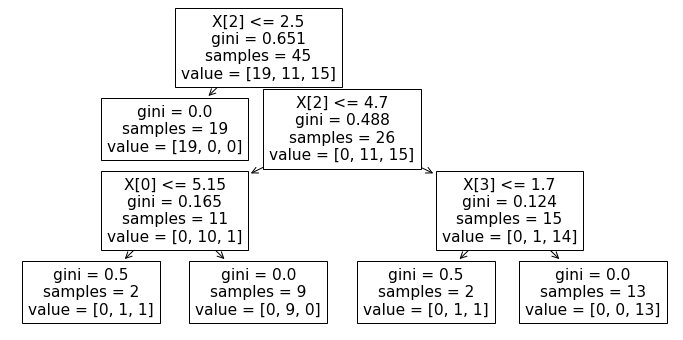

In [12]:
plt.figure(figsize=(12,6))
fig = plot_tree(
	dt_model,
	# feature_names=[],
	# class_names=,
	# filled=True,
);

In [ ]:
import mlflow

mlflow.set_experiment('DecisionTreeClassifier test')

with mlflow.start_run(run_name='init_params'):
	mlflow.sklearn.log_model(
		sk_model=dt_model,
		artifact_path='model',
		registered_model_name='tree_model_test'
	)

	mlflow.log_params(params=dt_params)
	mlflow.log_metric(key='Accuracy', value=acc_score)
	mlflow.log_artifact(fig, artifact_path='plots')


In [22]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, \
confusion_matrix, plot_confusion_matrix, f1_score, classification_report

import seaborn as sns
import numpy as np

In [20]:
X, y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

In [21]:
knn_params = {
	'n_neighbors': 6,
}
pipeline = Pipeline([
	('std', StandardScaler()),
	('knc', KNeighborsClassifier(**knn_params))
]).fit(X_train, y_train)
y_pred_knn = pipeline.predict(X_test)
cfm = confusion_matrix(y_test, y_pred_knn)

In [36]:
px.imshow(
	cfm, 
	title='Confusion Matrix ',
	text_auto=True,
	color_continuous_scale='viridis'
).update_layout(
	xaxis_title_text='Predicted labels',
	yaxis_title_text='True labels'
)

In [ ]:
from numpy import average


mlflow.set_experiment(experiment_name='Wine Experiment test')

tags = {
	'Project', 'Quality Analysis - Wine',
	'Team', 'Data Science',
	'Dataset', 'Wine Sklearn',
}

def get_metrics(y_true, y_pred):
	accuracy = accuracy_score(y_true, y_pred)
	precision = precision_score(y_true, y_pred, average='weighted')
	recall = recall_score(y_true, y_pred, average='weighted')
	f1 = f1_score(y_true, y_pred, average='weighted')

	return accuracy, precision, recall, f1

with mlflow.start_run(run_name='wine_analysis'):
	
	# define model hyperparams
	knn_params = {
		'n_neighbors': 6,
	}
	# create and fit model with pipeline
	pipeline = Pipeline([
		('std', StandardScaler()),
		('knc', KNeighborsClassifier(**knn_params))
	]).fit(X_train, y_train)
	# make predictions
	y_pred_knn = pipeline.predict(X_test)
	# get metrics scores
	accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_knn)
	# plot confusion matrix
